In [35]:
# =============================================================================
# Cell 1: Import Required Libraries
# =============================================================================

# Basic data manipulation and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

# Set up plotting style
plt.style.use('default')
sns.set_palette("husl")

In [36]:
# =============================================================================
# Cell 2: Load and Basic Info About Dataset
# =============================================================================

# Load the dataset
# This is our main dataset with ~14,000 Temu reviews
df = pd.read_csv('../src/data/raw/temu_reviews.csv')

# Check basic information about our dataset
print("Dataset shape:", df.shape)
print("\nColumn names:")
print(df.columns.tolist())

Dataset shape: (13855, 11)

Column names:
['UserId', 'UserName', 'UserCountry', 'ReviewCount', 'ReviewRating', 'ReviewTitle', 'ReviewText', 'ReviewDate', 'ReviewExperienceDate', 'ReplyText', 'ReplyDate']


In [37]:
# =============================================================================
# Cell 3: Display First Few Rows
# =============================================================================

# Look at the first few rows to understand data structure
print("First 10 rows of the dataset:")
df.head(10)

First 10 rows of the dataset:


,UserId,UserName,UserCountry,ReviewCount,ReviewRating,ReviewTitle,ReviewText,ReviewDate,ReviewExperienceDate,ReplyText,ReplyDate
0,686b7d1f8a5375318e8aec75,Farideh,DE,1,1,I strongly advise others to be cautious when d...,I returned two packages to Temu via DHL on 02....,2025-07-07T09:55:15.000Z,NaN,NaN,NaN
1,686b76324e662d0fc45ede4d,Howard,GB,7,4,I like temu tbf,I like temu tbfYou don't always get what's adv...,2025-07-07T09:32:34.000Z,NaN,NaN,NaN
2,595c91d00000ff000aab8ec2,Christine Anderson,GB,17,1,Missing parcels temu refund to do anything abo...,After meeting a number of complaints to this c...,2025-07-07T06:02:12.000Z,NaN,"Hello, thank you for reaching out to us. We ar...",2025-07-07T03:47:14.000Z
3,686afad92824b5385b2fc9c8,Biju Maharjan,AU,1,1,Temu Promotions = Scammy Circus Tricks,What a joke. Temu’s “buy 2 get 5 free” promo i...,2025-07-07T00:43:29.000Z,NaN,"Hello, thank you for participating in our prom...",2025-07-07T03:48:23.000Z
4,686aec848a5375f66f8a97e0,Mbonu Onyinye,NG,1,4,Good buying experience,My goods I ordered was delivered right at my d...,2025-07-07T00:01:31.000Z,NaN,NaN,NaN
5,60ddcb5fa7b1ad0013d921d9,HARIS W,CA,10,1,Temu prices are deceiving.,Temu prices are sometimes good. Definitely bet...,2025-07-06T21:56:05.000Z,NaN,"Hello, thank you for reaching out and we are s...",2025-07-07T03:49:36.000Z
6,632c5f1a2745c00016a74fd7,Robert George,GB,7,1,Lack of Customer Service,"Delivery slow, UK couriers tracking is wrong, ...",2025-07-06T21:35:17.000Z,NaN,"Hello, thank you for shopping with us and we a...",2025-07-07T03:51:12.000Z
7,65ab4318ec1a9e001201cc1e,Mimi Mal,GB,2,1,Absolutely rubbish won’t refund a…,Absolutely rubbish won’t refund a package I ne...,2025-07-06T21:18:15.000Z,NaN,"Hello, thank you for reaching out to us. We ar...",2025-07-07T03:52:07.000Z
8,686ac3c24e662d17eb5e6f33,Beth Blair,US,1,4,Satisfied Customer,I am satisfied with my order. I got it on a ti...,2025-07-06T20:43:29.000Z,NaN,NaN,NaN
9,5b9681f64de5666d34122e66,Mrs Alain De Jesus,GB,6,1,I ordered a shelf on temu only to be…,I ordered a shelf on temu only to be met by a ...,2025-07-06T18:25:18.000Z,NaN,"Hello, thank you for shopping on Temu! Your fe...",2025-07-07T06:48:55.000Z


In [38]:
# =============================================================================
# Cell 4: Data Types and Missing Values
# =============================================================================

# Check data types and missing values
print("Data types:")
print(df.dtypes)
print("\nMissing values:")
print(df.isnull().sum())

# Calculate percentage of missing values
missing_percentage = (df.isnull().sum() / len(df)) * 100
print("\nMissing values percentage:")
print(missing_percentage[missing_percentage > 0])

Data types:
UserId                   object
UserName                 object
UserCountry              object
ReviewCount               int64
ReviewRating              int64
ReviewTitle              object
ReviewText               object
ReviewDate               object
ReviewExperienceDate    float64
ReplyText                object
ReplyDate                object
dtype: object

Missing values:
UserId                      0
UserName                    3
UserCountry                18
ReviewCount                 0
ReviewRating                0
ReviewTitle                 0
ReviewText                130
ReviewDate                  0
ReviewExperienceDate    13855
ReplyText                   7
ReplyDate                   7
dtype: int64

Missing values percentage:
UserName                  0.021653
UserCountry               0.129917
ReviewText                0.938289
ReviewExperienceDate    100.000000
ReplyText                 0.050523
ReplyDate                 0.050523
dtype: float64


In [39]:
# =============================================================================
# Cell 5: Target Variable Analysis - Review Ratings
# =============================================================================

# Our target variable is ReviewRating (1-5 stars)
# This is the key variable we want to predict
print("Review Rating distribution:")
print(df['ReviewRating'].value_counts().sort_index())

# Basic statistics for ratings
print("\nRating statistics:")
print(df['ReviewRating'].describe())

Review Rating distribution:
ReviewRating
1    7219
2     878
3     655
4    1125
5    3978
Name: count, dtype: int64

Rating statistics:
count    13855.000000
mean         2.549982
std          1.781826
min          1.000000
25%          1.000000
50%          1.000000
75%          5.000000
max          5.000000
Name: ReviewRating, dtype: float64


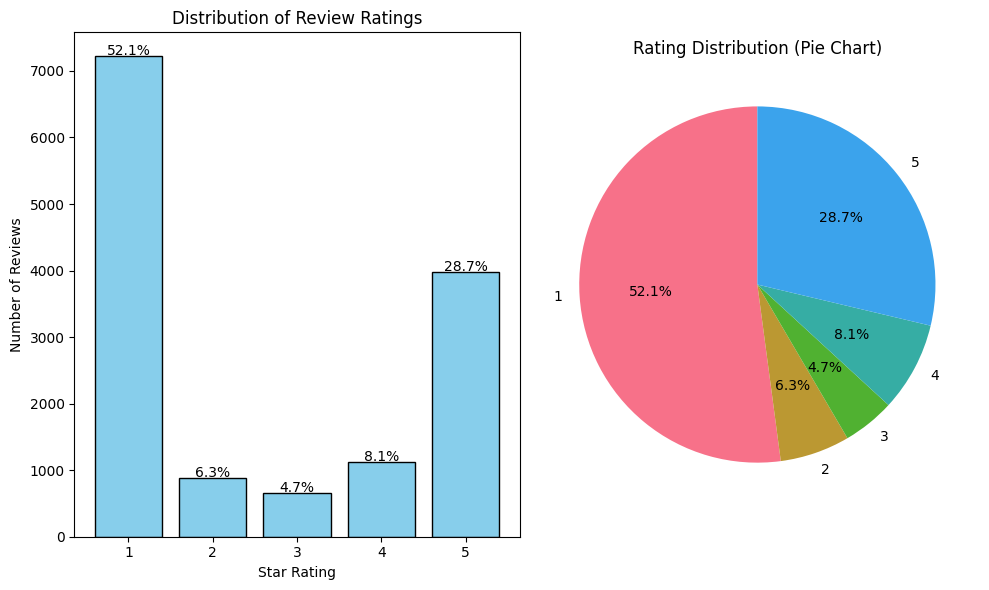

In [40]:
# =============================================================================
# Cell 6: Visualize Rating Distribution
# =============================================================================

# A bar plot to show rating distribution
plt.figure(figsize=(10, 6))
rating_counts = df['ReviewRating'].value_counts().sort_index()

plt.subplot(1, 2, 1)
plt.bar(rating_counts.index, rating_counts.values, color='skyblue', edgecolor='black')
plt.title('Distribution of Review Ratings')
plt.xlabel('Star Rating')
plt.ylabel('Number of Reviews')
plt.xticks(range(1, 6))

# Add percentage labels on bars
for i, v in enumerate(rating_counts.values):
    plt.text(i+1, v + 20, f'{v/len(df)*100:.1f}%', ha='center')

plt.subplot(1, 2, 2)
plt.pie(rating_counts.values, labels=rating_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Rating Distribution (Pie Chart)')

plt.tight_layout()
plt.show();

In [41]:
# =============================================================================
# Cell 7: Text Length Analysis
# =============================================================================

# Analyzing review text length - this might be important for prediction
df['review_length'] = df['ReviewText'].str.len()

print("Review text length statistics:")
print(df['review_length'].describe())

# Checks for very short or very long reviews
print(f"\nReviews shorter than 455 characters: {(df['review_length'] < 455).sum()}")
print(f"Reviews longer than 455 characters: {(df['review_length']    > 455).sum()}")

Review text length statistics:
count    13725.000000
mean       454.939016
std        468.729514
min         12.000000
25%        187.000000
50%        323.000000
75%        545.000000
max       4990.000000
Name: review_length, dtype: float64

Reviews shorter than 455 characters: 9249
Reviews longer than 455 characters: 4461


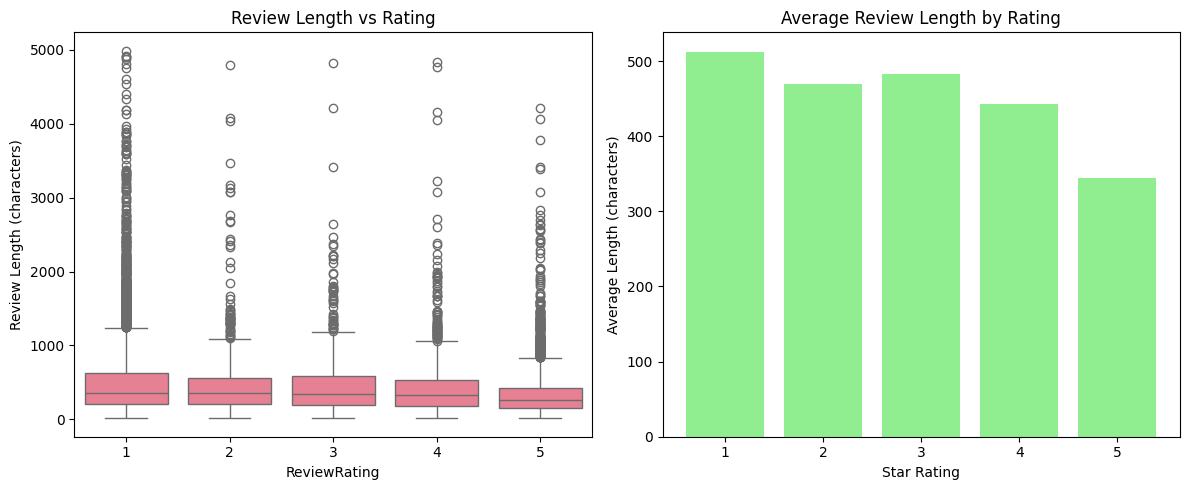

In [42]:
# =============================================================================
# Cell 8: Review Length vs Rating Analysis
# =============================================================================

# Visualizing relationship between review length and rating
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='ReviewRating', y='review_length')
plt.title('Review Length vs Rating')
plt.ylabel('Review Length (characters)')

plt.subplot(1, 2, 2)
# Grouping by rating and mean length
avg_length_by_rating = df.groupby('ReviewRating')['review_length'].mean()
plt.bar(avg_length_by_rating.index, avg_length_by_rating.values, color='lightgreen')
plt.title('Average Review Length by Rating')
plt.xlabel('Star Rating')
plt.ylabel('Average Length (characters)')
plt.xticks(range(1, 6))

plt.tight_layout()
plt.show()

Top 10 countries by number of reviews:
UserCountry
GB    6647
US    3442
CA     856
AU     563
IE     242
NZ     224
ZA     162
NL     141
AE     132
DK     120
Name: count, dtype: int64


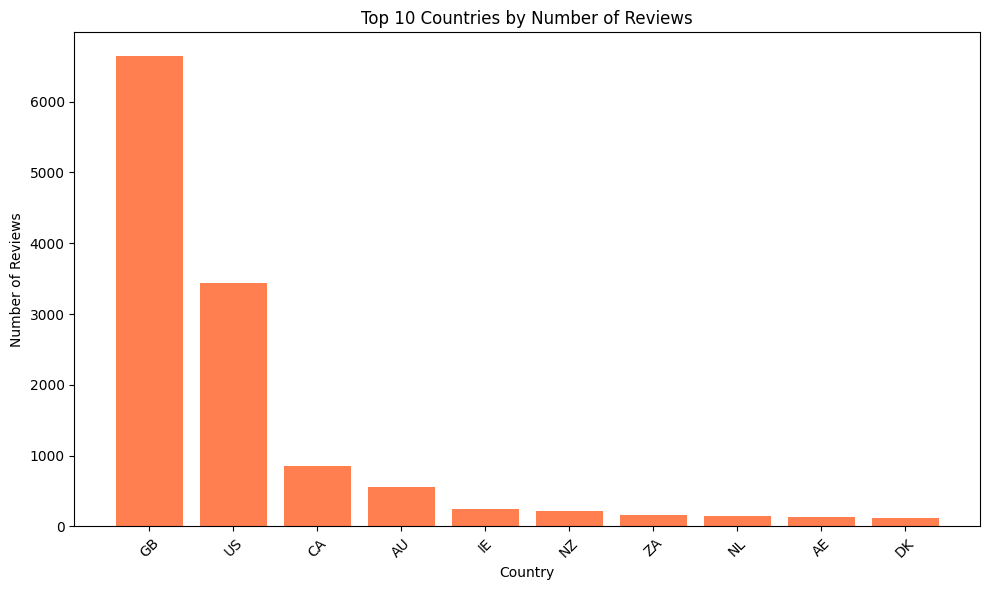

In [43]:
# =============================================================================
# Cell 9: User Country Analysis
# =============================================================================

# Analyzing user countries - might show geographic patterns
country_counts = df['UserCountry'].value_counts().head(10)
print("Top 10 countries by number of reviews:")
print(country_counts)

# Visualizating top countries
plt.figure(figsize=(10, 6))
plt.bar(country_counts.index, country_counts.values, color='coral')
plt.title('Top 10 Countries by Number of Reviews')
plt.xlabel('Country')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [44]:
# =============================================================================
# Cell 10: Review Count per User Analysis
# =============================================================================

# Checking how many reviews each user has written
user_review_counts = df['ReviewCount'].value_counts().head(10)
print("Distribution of review counts per user:")
print(user_review_counts)

# Checking if users with more reviews rate differently
avg_rating_by_user_reviews = df.groupby('ReviewCount')['ReviewRating'].mean().head(10)
print("\nAverage rating by user review count:")
print(avg_rating_by_user_reviews)

Distribution of review counts per user:
ReviewCount
1     3595
2     1912
3     1231
4      827
5      667
6      532
7      487
8      401
9      343
10     284
Name: count, dtype: int64

Average rating by user review count:
ReviewCount
1     2.332962
2     2.460774
3     2.603574
4     2.626360
5     2.628186
6     2.584586
7     2.583162
8     2.852868
9     2.673469
10    2.788732
Name: ReviewRating, dtype: float64


In [45]:
# =============================================================================
# Cell 11: Date Analysis
# =============================================================================

# Converting date columns to datetime
df['ReviewDate'] = pd.to_datetime(df['ReviewDate'])
df['ReviewExperienceDate'] = pd.to_datetime(df['ReviewExperienceDate'])

# Extract date components
df['review_year'] = df['ReviewDate'].dt.year
df['review_month'] = df['ReviewDate'].dt.month
df['review_day_of_week'] = df['ReviewDate'].dt.dayofweek

print("Review date range:")
print(f"From: {df['ReviewDate'].min()}")
print(f"To: {df['ReviewDate'].max()}")

Review date range:
From: 2022-09-30 04:14:43+00:00
To: 2025-07-07 09:56:03+00:00


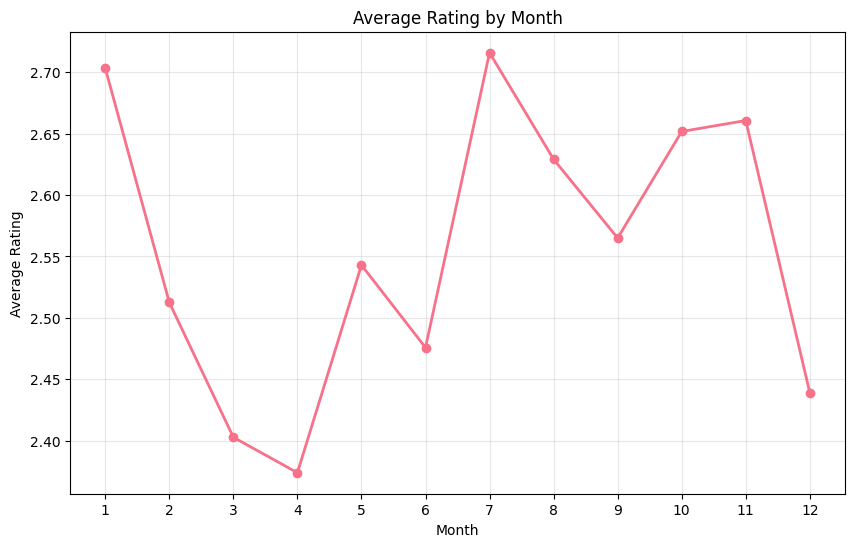

In [46]:
# =============================================================================
# Cell 12: Temporal Rating Patterns
# =============================================================================

# Checking if ratings change over time
monthly_ratings = df.groupby('review_month')['ReviewRating'].mean()

plt.figure(figsize=(10, 6))
plt.plot(monthly_ratings.index, monthly_ratings.values, marker='o', linewidth=2)
plt.title('Average Rating by Month')
plt.xlabel('Month')
plt.ylabel('Average Rating')
plt.xticks(range(1, 13))
plt.grid(True, alpha=0.3)
plt.show()

In [47]:
# =============================================================================
# Cell 13: Reply Analysis
# =============================================================================

# Checking how many reviews have replies from Temu
has_reply = df['ReplyText'].notna()
print(f"Reviews with replies: {has_reply.sum()} ({has_reply.sum()/len(df)*100:.1f}%)")

# Check if rating affects reply likelihood
reply_by_rating = df.groupby('ReviewRating')['ReplyText'].apply(lambda x: x.notna().sum())
print("\nReplies by rating:")
print(reply_by_rating)

Reviews with replies: 13848 (99.9%)

Replies by rating:
ReviewRating
1    7218
2     878
3     655
4    1120
5    3977
Name: ReplyText, dtype: int64


In [48]:
# =============================================================================
# Cell 14: Initial Data Quality Check
# =============================================================================

# Checking for potential data quality issues
print("Data Quality Check:")
print("==================")

# Checking for duplicate reviews
duplicates = df.duplicated(subset=['UserId', 'ReviewText']).sum()
print(f"Duplicate reviews: {duplicates}")

# Checking for missing review text (our main feature)
missing_text = df['ReviewText'].isnull().sum()
print(f"Missing review text: {missing_text}")

# Checking for invalid ratings
invalid_ratings = df[~df['ReviewRating'].isin([1, 2, 3, 4, 5])].shape[0]
print(f"Invalid ratings (not 1-5): {invalid_ratings}")

Data Quality Check:
Duplicate reviews: 1
Missing review text: 130
Invalid ratings (not 1-5): 0


In [49]:
# =============================================================================
# Cell 15: Sample Text Analysis
# =============================================================================

# Looking at some sample reviews for each rating
print("Sample reviews by rating:")
print("=" * 50)

for rating in sorted(df['ReviewRating'].unique()):
    print(f"\nRating {rating} example:")
    sample_review = df[df['ReviewRating'] == rating]['ReviewText'].iloc[0]

    #Checks if it's actually a string
    if pd.isna(sample_review):
        sample_review = "No review text available"

    # Display the first 200 characters of the review
    # and its length
    print(f"'{sample_review[:200]}...'")
    print(f"Length: {len(sample_review)} characters")

Sample reviews by rating:

Rating 1 example:
'I returned two packages to Temu via DHL on 02.06.2025. However, Temu claims they only received one package. DHL confirmed that both returns were sent under the same tracking number (003404346402631837...'
Length: 586 characters

Rating 2 example:
'I do not recommend this service. Shipping is slow. Many products are of poor quality. Customer service is often unavailable. The carrier Packeta, through which they ship, does not send SMS codes for p...'
Length: 325 characters

Rating 3 example:
'I have order a few times First time was good but 2 nd time,article never arrived and last time 2 weeks after promised date Not worth the frustration...'
Length: 148 characters

Rating 4 example:
'I like temu tbfYou don't always get what's advertised but still, there definitely a great place to order things very cheaply....'
Length: 125 characters

Rating 5 example:
'No review text available...'
Length: 24 characters


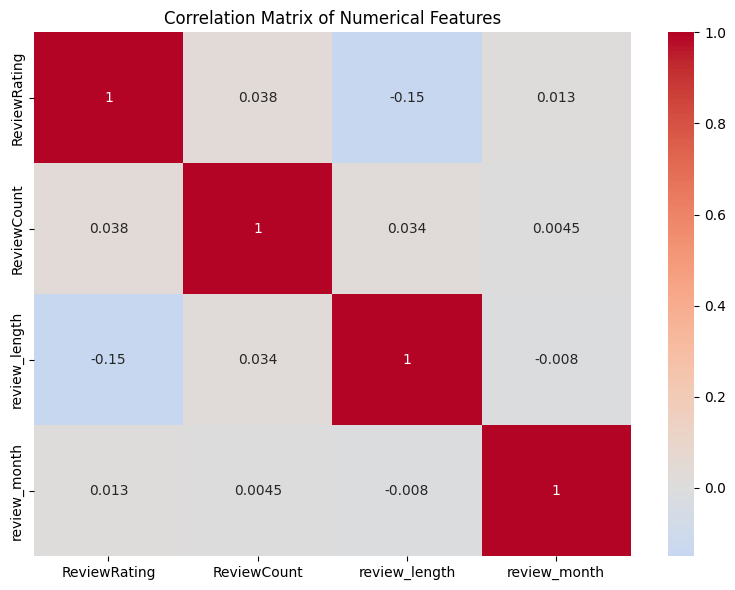

In [50]:
# =============================================================================
# Cell 16: Correlation Analysis
# =============================================================================

# Creating correlation matrix for numerical features
numerical_features = ['ReviewRating', 'ReviewCount', 'review_length', 'review_month']
correlation_matrix = df[numerical_features].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show();

In [51]:
# =============================================================================
# Cell 17: Summary Statistics
# =============================================================================

# Final summary of our dataset
print("Dataset Summary:")
print("=" * 50)
print(f"Total reviews: {len(df):,}")
print(f"Unique users: {df['UserId'].nunique():,}")
print(f"Countries represented: {df['UserCountry'].nunique()}")
print(f"Date range: {df['ReviewDate'].min().strftime('%Y-%m-%d')} to {df['ReviewDate'].max().strftime('%Y-%m-%d')}")
print(f"Average rating: {df['ReviewRating'].mean():.2f}")
print(f"Rating std deviation: {df['ReviewRating'].std():.2f}")
print(f"Average review length: {df['review_length'].mean():.1f} characters")

# Check class imbalance for our target variable
print(f"\nClass distribution for rating prediction:")
class_distribution = df['ReviewRating'].value_counts(normalize=True).sort_index()
for rating, percentage in class_distribution.items():
    print(f"Rating {rating}: {percentage:.1%}")

Dataset Summary:
Total reviews: 13,855
Unique users: 13,854
Countries represented: 117
Date range: 2022-09-30 to 2025-07-07
Average rating: 2.55
Rating std deviation: 1.78
Average review length: 454.9 characters

Class distribution for rating prediction:
Rating 1: 52.1%
Rating 2: 6.3%
Rating 3: 4.7%
Rating 4: 8.1%
Rating 5: 28.7%


In [52]:
# =============================================================================
# IMPORTANT FINDINGS AND NEXT STEPS
# =============================================================================

print("\n" + "="*80)
print("KEY FINDINGS FROM DATA EXPLORATION:")
print("="*80)
print("1. We have a good dataset size (~14,000 reviews)")
print("2. Ratings are imbalanced - many 5-star reviews, fewer 1-2 star reviews")
print("3. Review length varies significantly and might be predictive")
print("4. Most reviews have company replies, especially negative ones")
print("5. Data quality seems good with minimal missing values")
print("6. Next step: Text preprocessing and feature engineering")


KEY FINDINGS FROM DATA EXPLORATION:
1. We have a good dataset size (~14,000 reviews)
2. Ratings are imbalanced - many 5-star reviews, fewer 1-2 star reviews
3. Review length varies significantly and might be predictive
4. Most reviews have company replies, especially negative ones
5. Data quality seems good with minimal missing values
6. Next step: Text preprocessing and feature engineering
